In [1]:
import seaborn
from matplotlib import pyplot

import swasputils

In [2]:
classifications = swasputils.ZooniverseClassifications().get_workflow(7534)

In [3]:
classification_counts = classifications.count_annotations()

In [4]:
classification_fracs = classification_counts.apply(lambda x: x/x.sum(), axis=1)

In [5]:
classification_fracs.head()

annotation_T0,EA/EB type,EW type,Junk,Pulsator,Rotator,Unknown
subject_ids,,,,,,
21803099,0.0,0.0,1.0,0.0,0.0,0.0
21803103,1.0,0.0,0.0,0.0,0.0,0.0
21803109,0.0,0.0,1.0,0.0,0.0,0.0
21803115,1.0,0.0,0.0,0.0,0.0,0.0
21803118,0.0,0.0,1.0,0.0,0.0,0.0


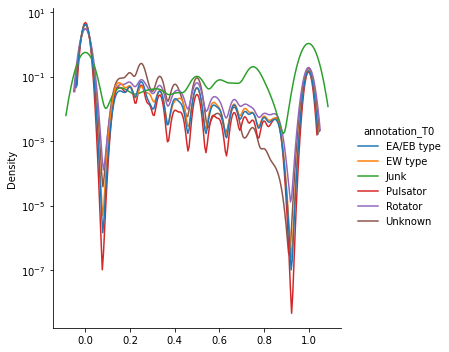

In [6]:
seaborn.displot(data=classification_fracs, log_scale=(False, True), kind='kde')

In [7]:
EXPERT_USERS = ('AJNORTON', 'HeidiThiemann')
expert_classifications = classifications.get_users(EXPERT_USERS)
expert_classifications.df.drop_duplicates('subject_ids', inplace=True)
expert_classifications.decode_annotations()
gold_standard_subjects = expert_classifications.df['subject_ids']

<ipython-input-7-96b2092cb570>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  expert_classifications.df.drop_duplicates('subject_ids', inplace=True)


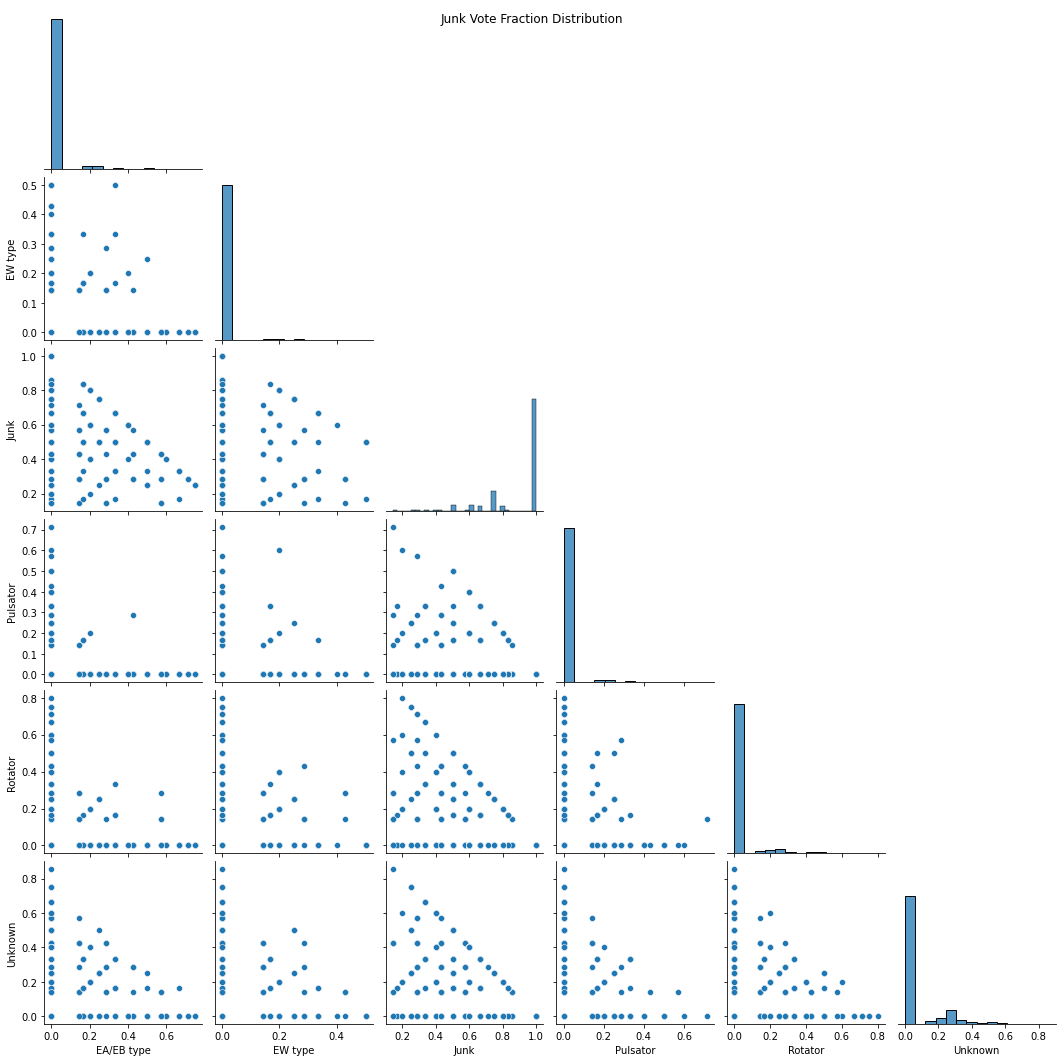

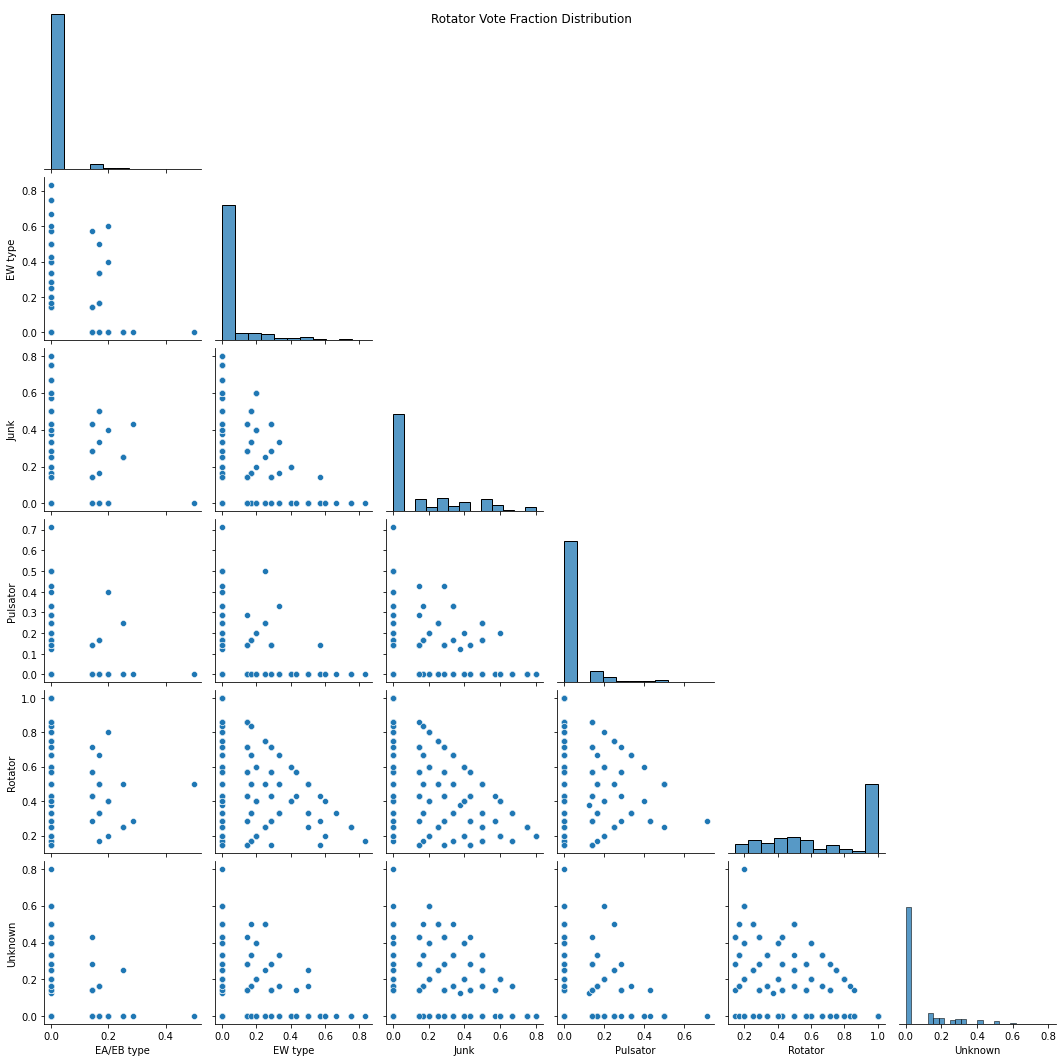

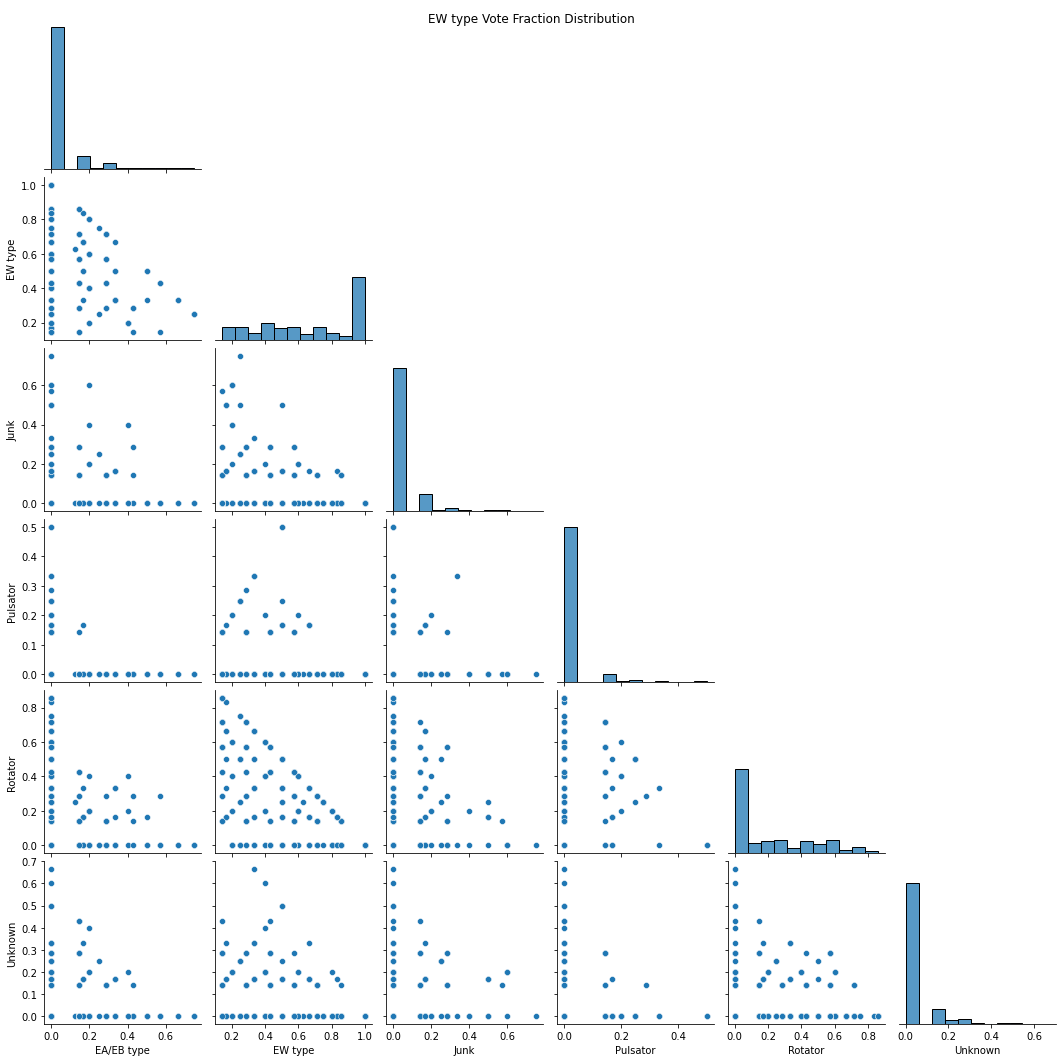

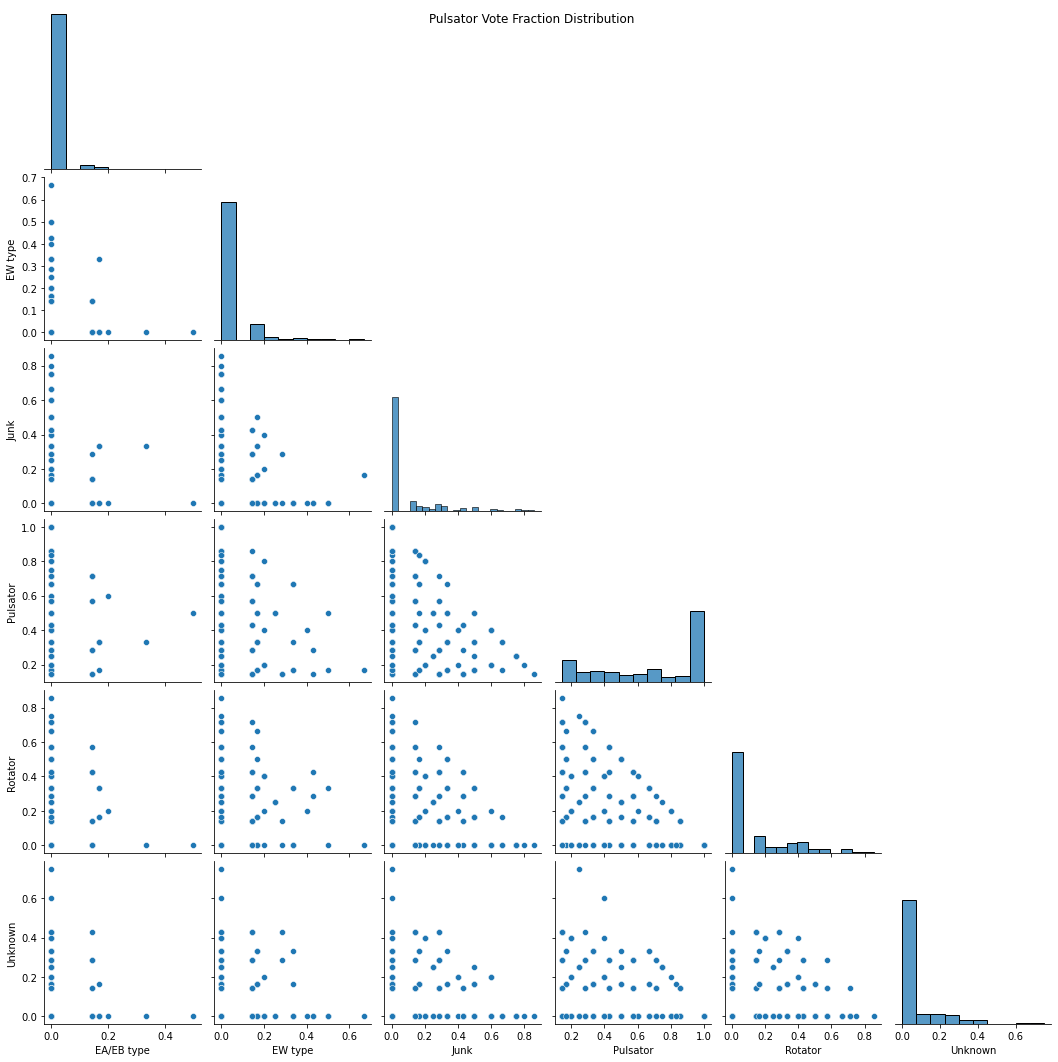

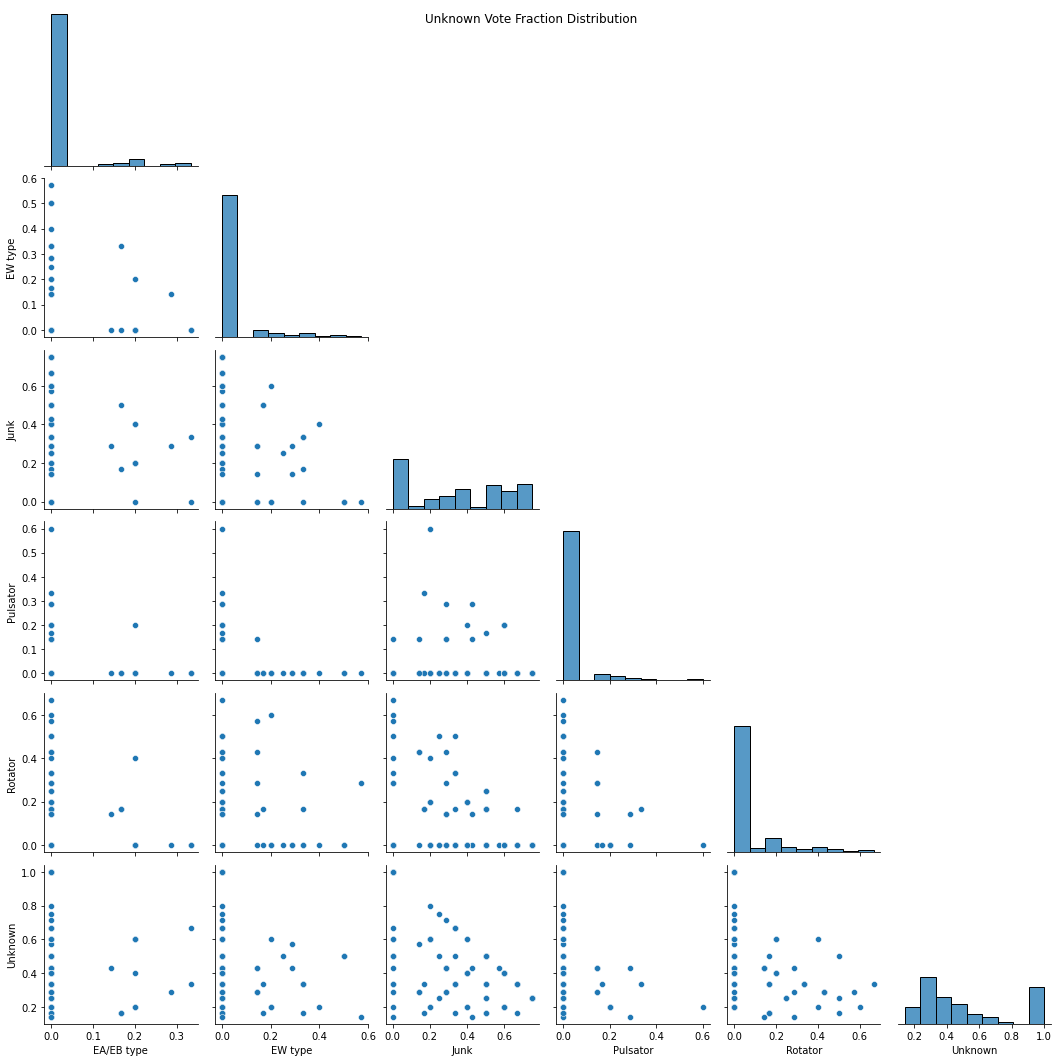

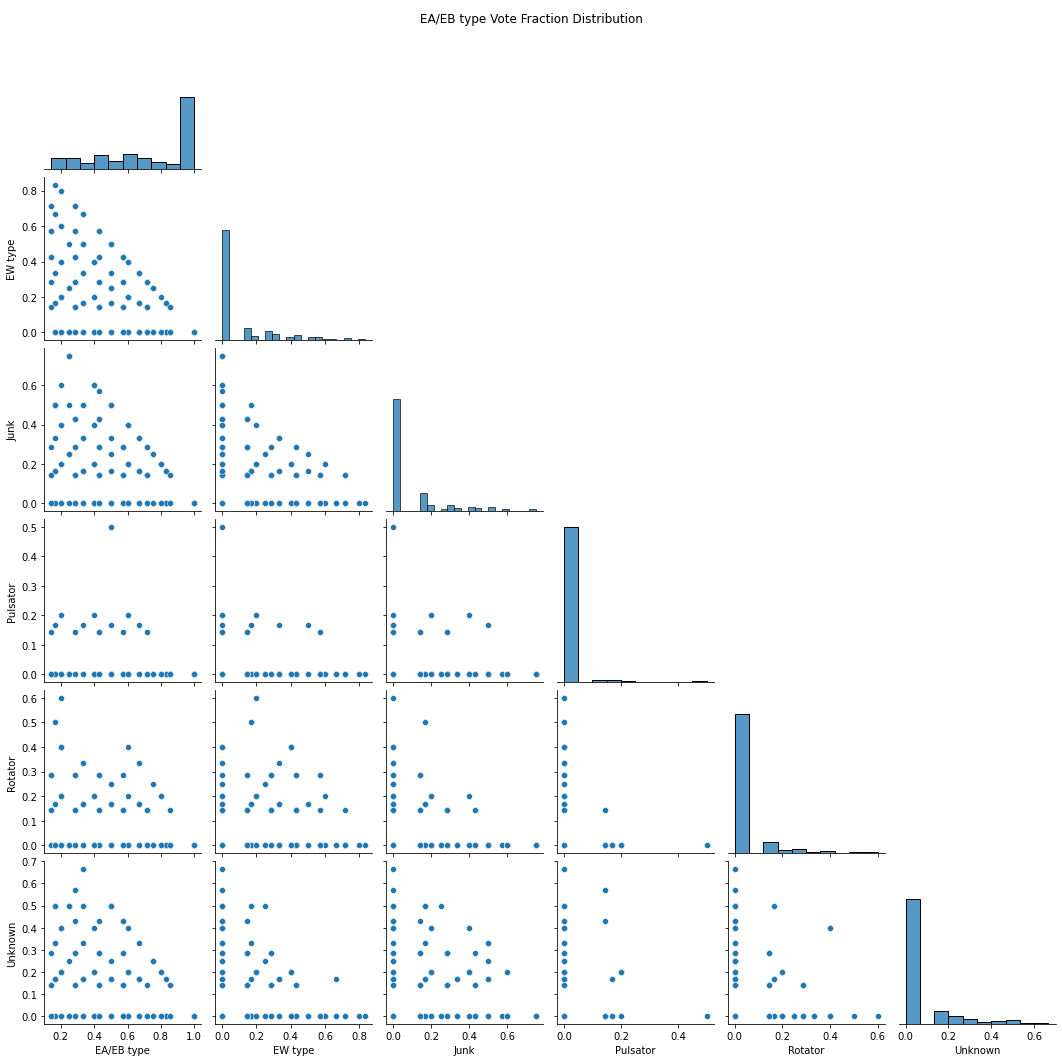

In [8]:
for subject_type in expert_classifications.df['annotation_T0'].unique():
    grid = seaborn.pairplot(
        classification_fracs[classification_fracs.index.isin(
            expert_classifications.df[expert_classifications.df['annotation_T0'] == subject_type]['subject_ids']
        )],
        corner=True,
    )
    grid.fig.suptitle('{} Vote Fraction Distribution'.format(subject_type))

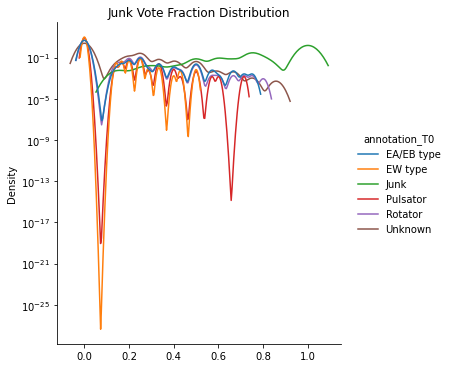

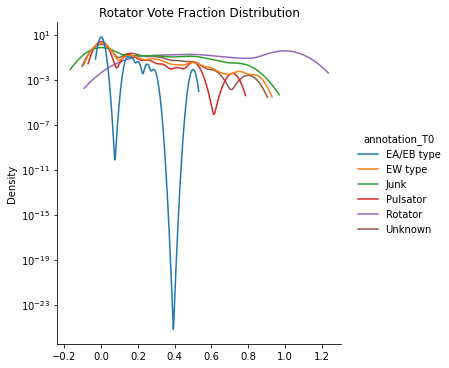

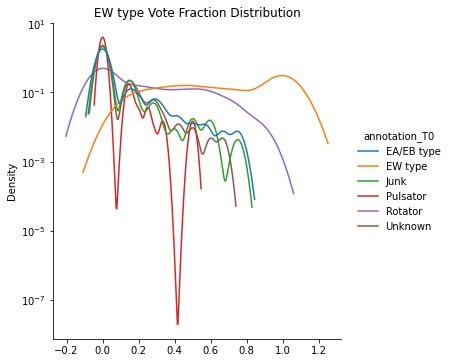

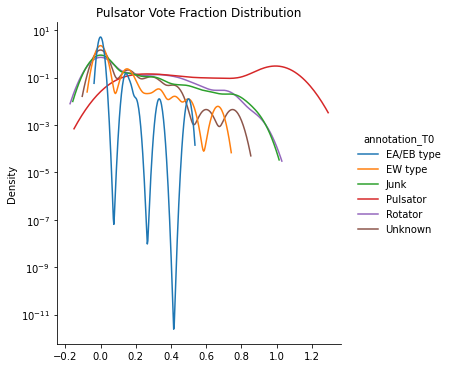

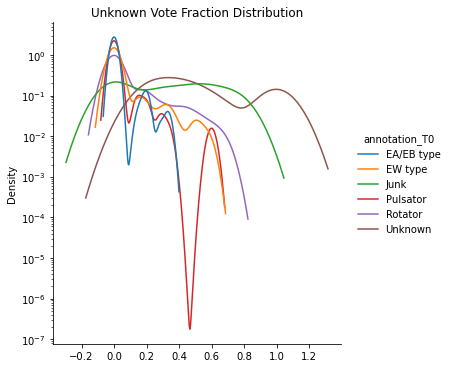

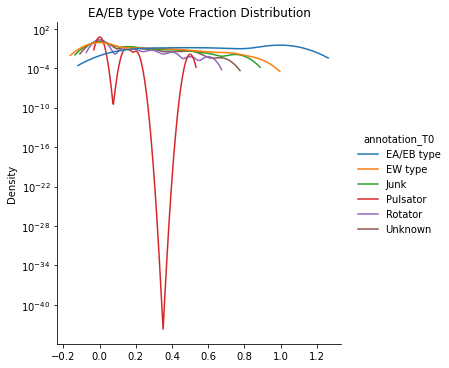

In [9]:
for subject_type in expert_classifications.df['annotation_T0'].unique():
    seaborn.displot(
        classification_fracs[classification_fracs.index.isin(
            expert_classifications.df[expert_classifications.df['annotation_T0'] == subject_type]['subject_ids']
        )],
        kind='kde',
        log_scale=(False, True),
    )
    pyplot.title('{} Vote Fraction Distribution'.format(subject_type))

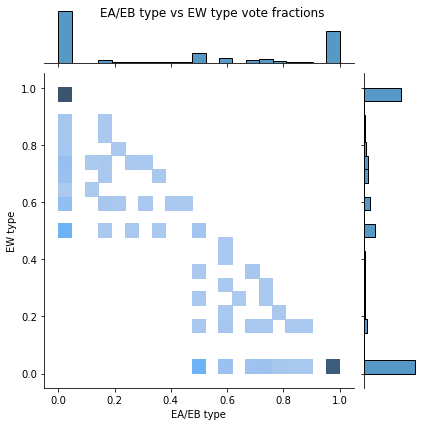

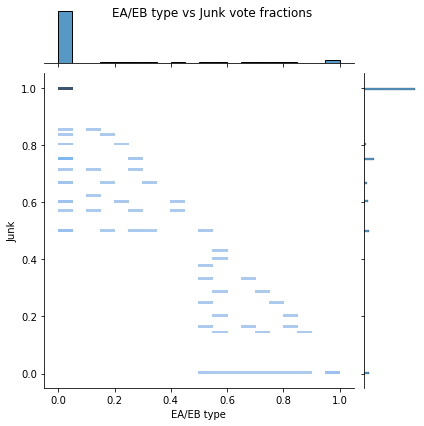

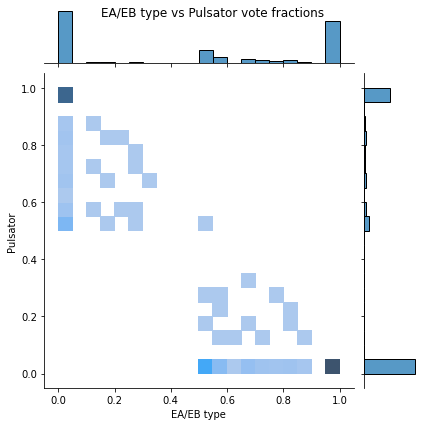

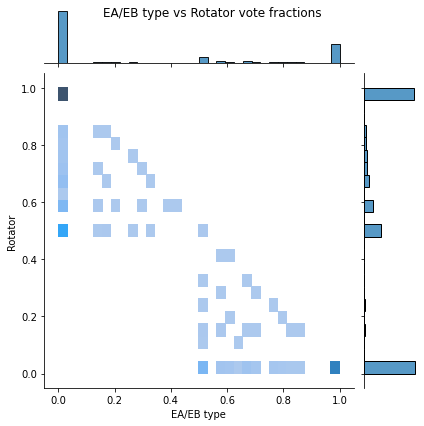

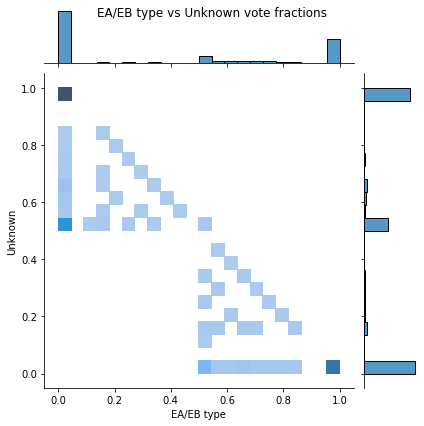

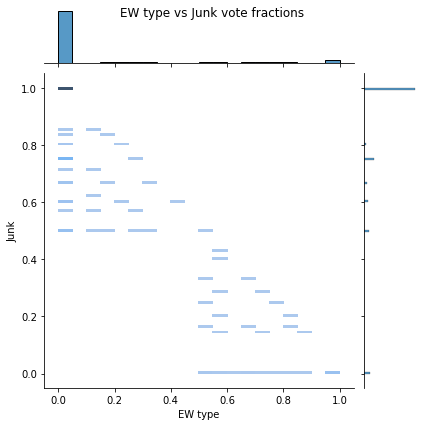

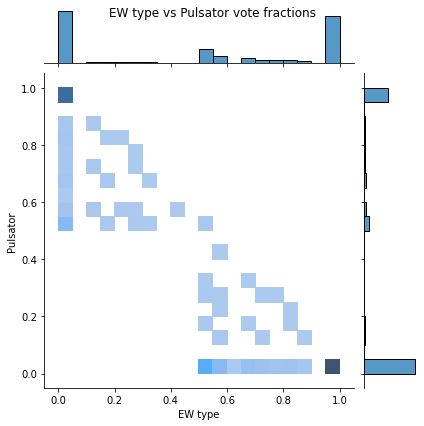

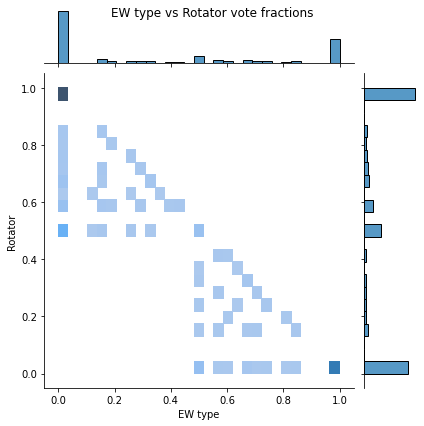

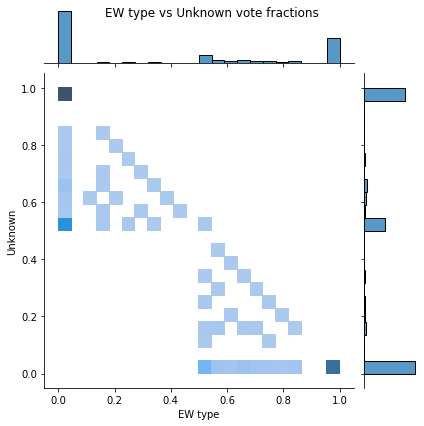

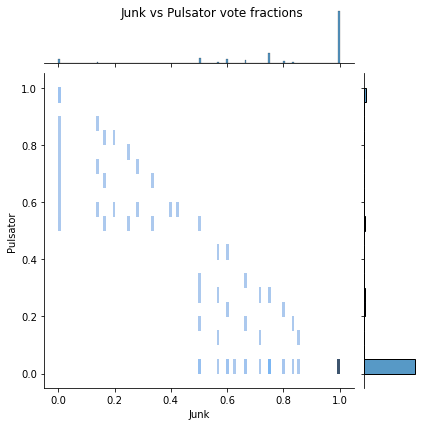

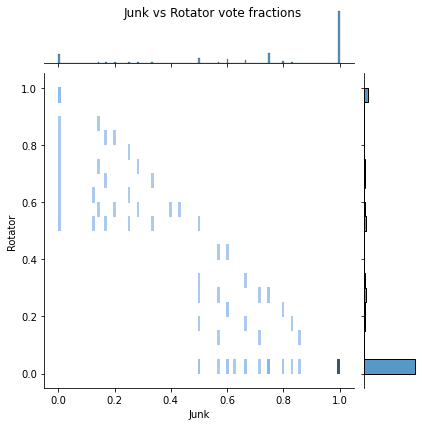

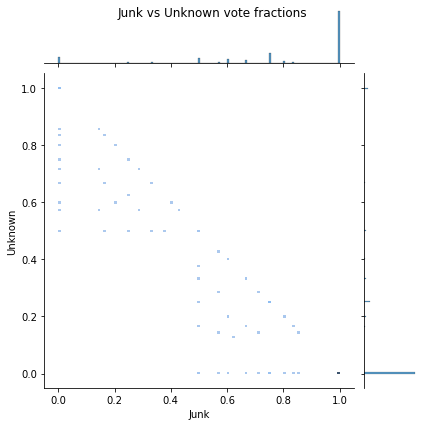

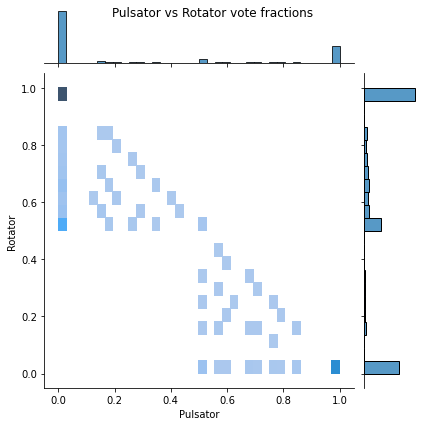

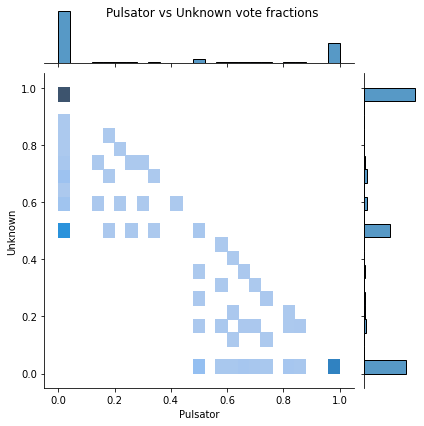

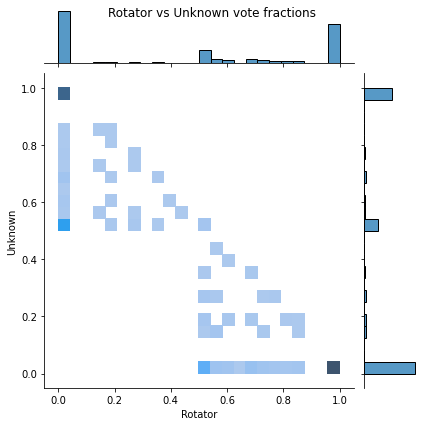

In [10]:
plotted_combos = set()
for x_type in classification_fracs.keys():
    for y_type in classification_fracs.keys():
        if x_type == y_type or (y_type, x_type) in plotted_combos:
            continue

        p = seaborn.jointplot(
            data=classification_fracs[(classification_fracs[x_type] >= 0.5) | (classification_fracs[y_type] >= 0.5)],
            x=x_type,
            y=y_type,
            kind='hist',
        )
        p.fig.suptitle('{} vs {} vote fractions'.format(x_type, y_type))
        plotted_combos.add((x_type, y_type))